# 1 True/False Questions (20 pts)
For each question, please provide a short explanation to support your judgment.


### Problem 1.1 

(2 pts) Directly using SGD to optimize a sparsity-inducing regularizer (i.e. L-1, DeepHoyer etc.) with the training loss will lead to exact zero values in the weight elements, there’s no need to apply additional pruning step after the optimization process.

> False, when using SGD to optimize a sparsity-inducing regularizer, L-1 regularization will help guide the parameters in the DNN twards zero. A final pruning step with a small constant threshold is needed to reach as sparse model. When adding the final pruning step, values below a threshold are converted to 0. 

### Problem 1.2 

(2 pts) The sparsity of a model will typically not change if hard thresholding (iterative pruning) with a fixed percentile threshold is applied, while the sparsity will gradually increase when soft thresholding operator is applied in the training.

> True, sparsity of a model will typically not change during hard thresholding with a fixed percentile threshold. Since the proximal operator functions during each epoch, as opposed to a hard threshold which prunes weights after training is completed, any weight that drops below the threshold during training will be made 0, leading to a gradual increase in sparsity during training. Furthermore we can look at Hoyer-squared where we see as epochs increase so does the trimming threshold which makes weights zero. 

### Problem 1.3 

(2 pts) Using soft thresholding operator will lead to better results comparing to using L-1 regularization directly as it makes the optimization smoother and solves the "bias" problem of L-1.

> False, using the soft thresholding operator alone does not solve the bias problem of L-1. Using Trimmed L-1, which has a soft thresholding operator, which does indeed make optimization smoother, does solve this bias problem. It does this by applying the L-1 penalty to a certain percentage of the smallest weights while leaving larger weights unpenalized. 

### Problem 1.4 

(2 pts) Group Lasso can lead to structured sparsity on DNNs, which is more hardware-friendly. The idea of Group Lasso comes from applying L-2 regularization to the L-1 norm of all of the groups.

> False because in Group Lasso, L-1 regularization is applied on L-2 norm of all the groups.  

### Problem 1.5 

(2 pts) The Hoyer regularizer is similar to L-0 regularizer in that it is scale-invariant. The Hoyer-square regularizer shows an automatic ’trimming’ effect to preserve larger weights while penalizing smaller ones. Therefore, it has a great approximation of the L-0 norm and thus it is beneficial for crafting sparse DNN models.

> True, the Hoyer regularizer is indeed scale-invariant and does have a trimming effect that turns weights with smaller absolute values to zero while protecting larger weights. This trimming threshold is gradually increased as more weights come close to zero. This makes it a great approximation of the L-0 norm and thus is beneficial for crafting sparse DNN models.

### Problem 1.6 

(2 pts) Proximal gradient descent introduces an additional proximity term to minimize regularization loss in the proximity of weight parameters. While the proximity term does not change the optimal solution, it allows smoother convergence of the overall objective.

> True, the additonal term minimizes regularization loss in the proximity of weight parameters. This enables smoother convergence towards the optimal solution which does not change. If the absolute value of the weight is larger than lambda, then lambda is substracted from the weights. If the weights are smaller than lambda, they are set to zero. 



### Problem 1.7 

(2 pts) The objective of trimmed L1 is equivalent to setting up an L-0 constraint on sparse minimization problem. This gives a much stronger guarantee on the sparsity than Lasso (i.e. L-1 regularizer).

> True, using trimmed L1 is much stronger than the guarantee on L-1 regularization. The objective of trimmed L1 is indeed equivalent to setting up an L-0 constraint as they both try to achieve a maximum number of 0 values for the weights. The guarentee on sparsity is larger as trimmed L-1 penalizes a percentage of the smaller weights using the proximal operator, which sets weights that are smaller than lambda to zero.

### Problem 1.8 

(2 pts) When applied to pruning deep neural network, ADMM-based method can lead to higher sparsity comparing to L-1 based methods under same accuracy without additional training cost.

> False, there is additional training cost as variable splitting is used. Since we have f(x) and g(z) there is an additional training cost as we compute both of these functions. There are two-times more variables during optimization. 

### Problem 1.9 

(2 pts) When training a quantized model with STE, both the forward-pass and the gradient accumulation will be performed with the full-precision weight kept in the training process.

> False, forward-pass uses the quantized weights and the loss is calculated with these quantized weights during backpropagation as well. However, the weight update is applied to the full-precision weights, which are then quantized for the next epoch. 

### Problem 1.10 

(2 pts) Comparing to quantizing all the layers in a DNN to the same precision, mixed-precision quantization scheme can reach higher accuracy with a similar-sized model.

> True, performing mixed-precision quantization can provide better size-acrraucy tradeoff than fixed quantization. The first layer in the model and the last fully connected layer are extremly important and thus having higher precision in these layer may be helpful in achieving a higher accuracy. 

# 2 Lab 1: Sparse optimization of linear models (40+10 pts)

By now you have seen multiple ways to induce a sparse solution in the optimization process. This problem will provide you some examples under linear regression setting so that you can compare the effectiveness of different methods. For this problem, consider the case where we are trying to find a sparse weight $W$ that can minimize $L = \sum_{i} (X_i W − y_i)^{2}$ Specifically, we have $X_i ∈$ $\mathbb{R}^{1 \times 5}$, $W ∈$ $\mathbb{R}^{1 \times 5}$ and $||W||_0 \leq 2$


For Problem (a)-(f), consider the case where we have 3 data points:($X_1$ =[1,−2,−1,−1,1], $y_1$ =−7); ($X_2$ = [2, −1, 2, 0, −2], $y_2$ = −1); ($X_3$ = [−1, 0, 2, 2, 1], $Y_3$ = −1). For stability The objective $L$ should be minimized through full-batch gradient descent, with initial weight $W^0$ set to [0; 0; 0; 0; 0] and use learning rate $\mu$ = 0.02 throughout the process. Please run gradient descent for 200 steps for all the following problems.
You will need to use NumPy to finish this set of questions, please put all your code for this set of questions into one python/notebook file and submit it on Sakai. Please include all your results, figures and observations into your PDF report.

**(a)** (4pts) Theoretical analysis: with learning rate μ, suppose the weight you have after step $k$ is $W_k$, derive the symbolic formulation of weight $W_{k+1}$ after step $k+1$ of full-batch gradient descent with $x_i$, $y_i$, $i$ ∈ {1, 2, 3}. (Hint: note the loss $L$ we have is defined differently from standard MSE loss.)


$$L = \sum_{i} (X_i W − y_i)^{2}$$

$$W^{k+1} = W^k - \mu \times \frac{\partial L}{\partial W}(W^k)$$

$$\frac{\partial L}{\partial W} = 2 \times \sum_i X^T_i (X_i W - y_i)$$

$$W^{k+1} = W^k - 2\mu \sum_i X^T_i (X_i W - y_i)$$



In [327]:
import numpy as np

u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200

x1, x2, x3 = np.array([1, -2, -1, -1, 1]), np.array([2, -1, 2, 0, -2]), np.array([-1, 0, 2, 2, 1])
y1, y2, y3 = -7, -1, -1

# Load as one sample since were doing batch descent 
X = np.vstack((x1, x2, x3))
y = np.vstack((y1, y2, y3))

for i in range(epochs):
    w_array[i] = w.flatten() # Store weights in pre-allocated array
    w = w - 2 * u * (X.T @ (X@w - y)) # Update weights
    losses.append(np.sum(((X @ w) - y)**2)) # Store loss

**(b)** (7 pts) In Python, directly minimize the objective L without any sparsity-inducing regularization/constraint. Plot the value of $log(L)$ vs. #steps throughout the training, and use another figure to plot how the value of each element in W is changing throughout the training. From your result, is W converging to an optimal solution? Is W converging to a sparse solution?

> From my results, the weights are indeed convergin to an optimal solution although it is not a sparse solution.

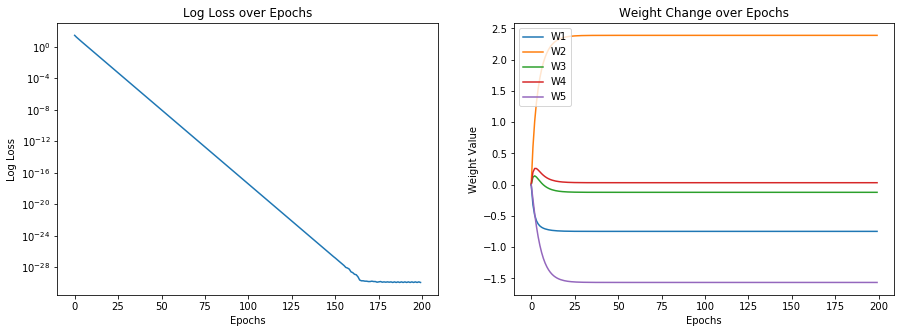

In [328]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.title('Log Loss over Epochs')
plt.plot(losses)


plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(w_array[:,i], label = f'W{i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Change over Epochs')
plt.show()

**(c)** (7 pts) Since we have the knowledge that the ground-truth weight should have $||W||_0 ≤ 2$, we can apply iterative pruning to enforce this sparse constraint. Redo the optimization process in (b), this time prune the elements in $W$ after every gradient descent step to ensure $||W^l||_0 ≤ 2$. Plot the value of $log(L)$ throughout the training, and use another figure the plot the value of each element in W in each step. From your result, is W converging to an optimal solution? Is W converging to a sparse solution?

>W is indeed converging to an optimal solution and it is a sparse solution. We see that during training, even if a weight was first pruned, after an update, the magnitudes of the weights are looked at again to judge how important a weight is. This leads to weight 1 first not being pruned, but then becoming pruned around epoch 10 as weight 5 becomes more 'important' (larger magnitude). 

In [329]:
import numpy as np

u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200
w = np.array([0,0,0,0,0]).reshape(5,1)

for i in range(epochs):
    num_prune = 3 # number of elements pruned to zero
    w_array[i] = w.flatten() # Store weights in pre-allocated array
    w = w - 2 * u * (X.T @ (X@w - y)) # Update weights
    w[np.argpartition(np.abs(w.flatten()), 3)[:3]] = 0
    losses.append(np.sum(((X @ w) - y)**2)) # Store loss

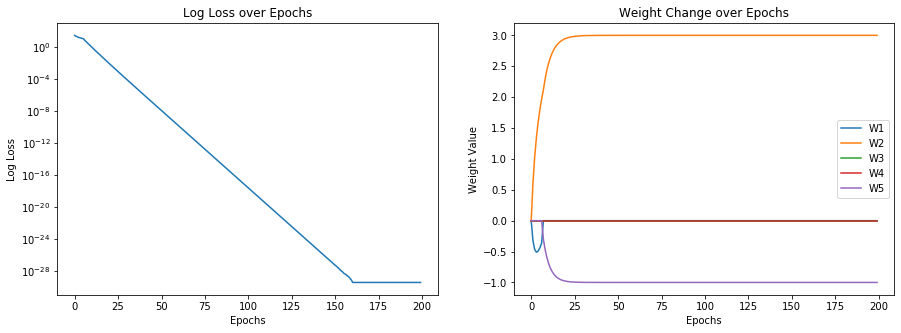

In [330]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.title('Log Loss over Epochs')
plt.plot(losses)


plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(w_array[:,i], label = f'W{i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Change over Epochs')
plt.show()

**(d)** (7 pts) In this problem we apply $l_1$ regularization to induce the sparse solution. The minimization objective therefore changes to $L + λ||W||_1$. Please use full-batch gradient descent to minimize this objective, with $λ = {0.2, 0.5, 1.0, 2.0}$ respectively. For each case, plot the value of $log(L)$ throughout the training, and use another figure the plot the value of each element in W in each step. From your result, comment on the convergence performance under different λ.

> As λ increases sparsity is met quicker. Furthermore, the larger λ is, the larger the loss. I also notice that the loss and the weights tend to oscillate when approaching the optimal values for the weights. 

In [331]:
lamb = [0.2, 0.5, 1.0, 2.0]
loss_list = []
w_list = []

for j in range(len(lamb)):
    u = 0.02
    losses = []
    w_array = np.zeros((200,5))
    w = np.array([0,0,0,0,0]).reshape(5,1)
    epochs = 200

    for i in range(epochs):
        w_array[i] = w.flatten() # Store weights in pre-allocated array
        w = w - 2 * u *((X.T @ (X@w - y)) + lamb[j]*np.sign(w)) # Update weights (this time with l1 too)

        losses.append(np.sum(((X @ w) - y)**2)) #+ lamb[j] * np.linalg.norm(w, ord=1)) # Store loss (this time with l1 too)
    loss_list.append(losses)
    w_list.append(w_array)

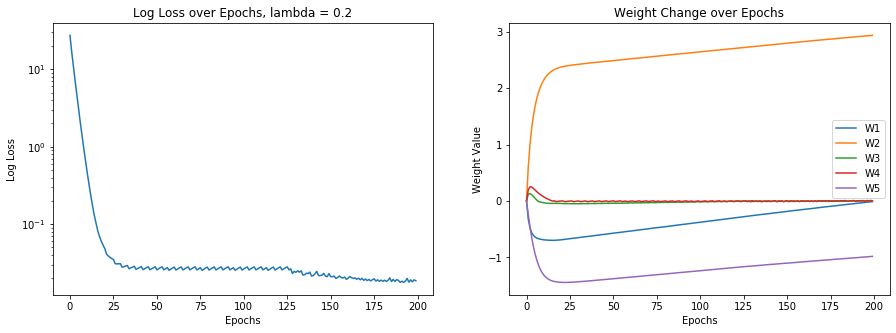

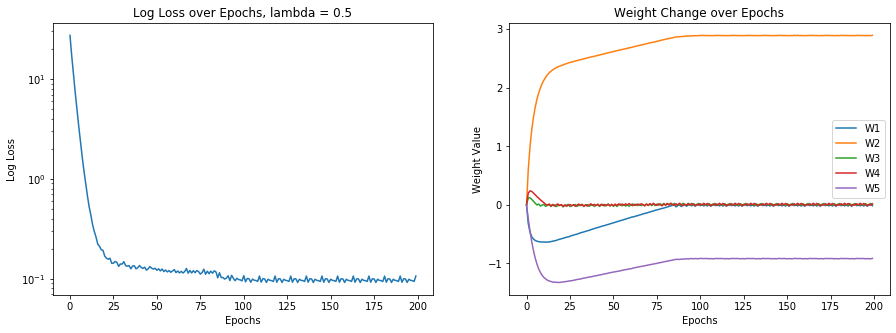

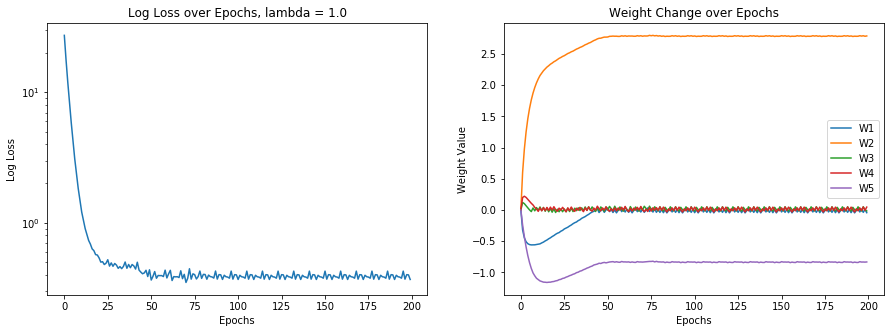

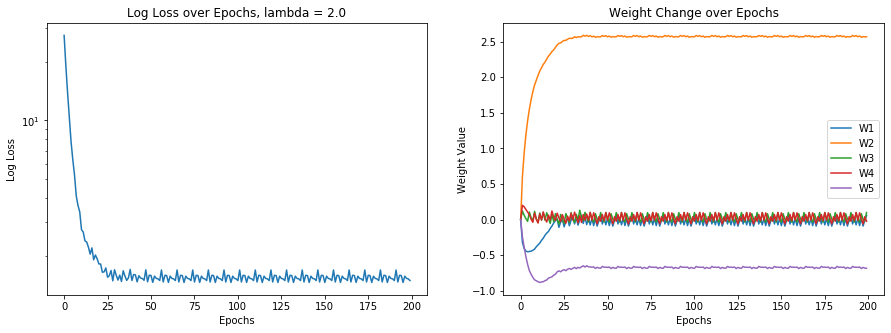

In [332]:
import warnings
warnings.filterwarnings('ignore')

label_list = ['W1','W2','W3','W4','W5']
for i in range(0,4):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.yscale('log')
    plt.title(f'Log Loss over Epochs, lambda = {lamb[i]}')

    plt.plot(np.array(loss_list[i]))

    for j in range(0,5):
        plt.subplot(1,2,2)
        plt.plot(np.array(w_list[i][:,j]), label = label_list[j])
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Weight Value')
    plt.title('Weight Change over Epochs')
    plt.show()

**(e)** (7 pts) Here we optimize the same objective as in (d), this time using proximal gradient update. Recall that the proximal operator of the $l1$ regularizer is the soft thresholding function. Set the threshold in the soft thresholding function to {0.004, 0.01, 0.02, 0.04} respectively. Plot the value of $log(L)$ throughout the training, and use another figure the plot the value of each element in $W$ in each step. Compare the convergence performance with the results in (d). (Hint: Optimizing $L + λ||W||_1$ using gradient descent with learning rate μ should correspond to proximal gradient update with threshold μλ)

> The convergence performance appears almost identical to the the l1 regularization seen in (d). When increasing the threshold we see that weights head towards and become 0 in less epochs. Using the proximal operater appears to allow for smoother convergence towards optimal values for the weights, when compared to (d). The loss also increases as the threshold increases as well. 

In [333]:
thresh = [0.004, 0.01, 0.02, 0.04]
w_list = []
loss_list =[]

for j in range(len(thresh)):
    u = 0.02
    losses = []
    w_array = np.zeros((200,5))
    w = np.array([0,0,0,0,0]).reshape(5,1)
    epochs = 200

    for i in range(epochs):
        w_array[i] = w.flatten() # Store weights in pre-allocated array
        w = w - 2 * u *(X.T @ (X@w - y)) # Update weights 
        
        # Proximity operator 
        greater = w > thresh[j]
        zero = np.abs(w) <= thresh[j]
        less = w < -thresh[j]
        
        w[greater] -= thresh[j] 
        w[zero] = 0
        w[less] += thresh[j]

        losses.append(np.sum(((X @ w) - y)**2)) # Store loss 
    loss_list.append(losses)
    w_list.append(w_array)

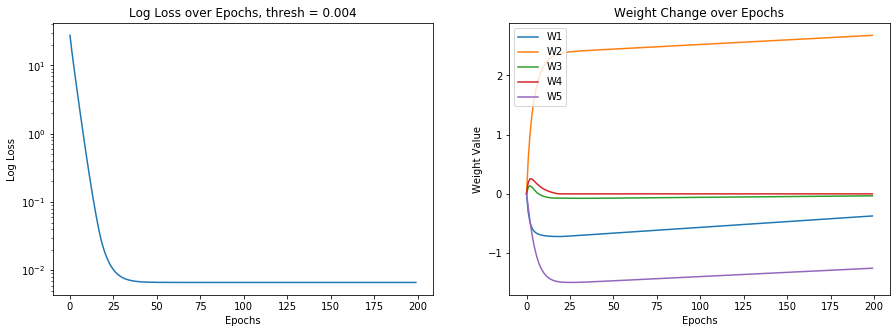

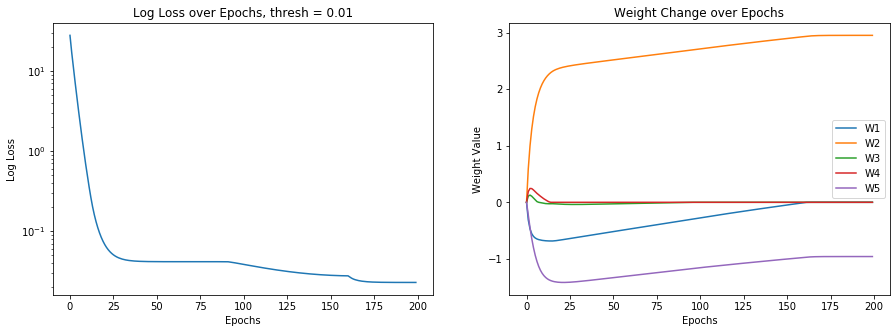

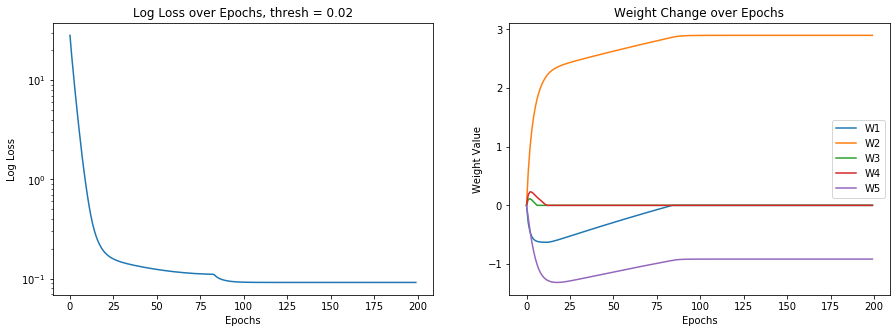

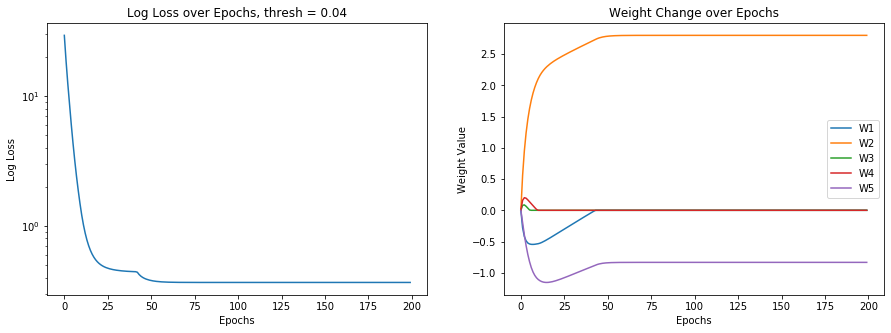

In [334]:
label_list = ['W1','W2','W3','W4','W5']
for i in range(0,4):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.yscale('log')
    plt.title(f'Log Loss over Epochs, thresh = {thresh[i]}')

    plt.plot(np.array(loss_list[i]))

    for j in range(0,5):
        plt.subplot(1,2,2)
        plt.plot(np.array(w_list[i][:,j]), label = label_list[j])
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Weight Value')
    plt.title('Weight Change over Epochs')
    plt.show()

**(f)** (8 pts) Trimmed $l_1$ ($Tl_1$) regularizer is proposed to solve the “bias” problem of $l_1$. For simplicity you may implement the $Tl_1$ regularizer as applying a $l_1$ regularization with strength λ on the 3 elements of $W$ with the smallest absolute value, with no penalty on other elements. Minimize $L + λT l_{1}(W)$ using proximal gradient update with λ = {1.0, 2.0, 5.0, 10.0} (correspond the soft thresholding threshold {0.02, 0.04, 0.1, 0.2}). Plot the value of $log(L)$ throughout the training, and use another figure the plot the value of each element in $W$ in each step. Comment on the convergence comparison of the Trimmed $l_1$ and the $l_1$. Also compare the behavior of the early steps (e.g. first 20) between the Trimmed $l_1$ and the iterative pruning.

>Trimmed $l_1$ appears to converge faster than $l_1$ for every sensitivity hyperparameter (threshold and lambda) level. Iterative pruning immediatly sets three weights to 0. For trimmed $l_1$, it takes time for the weights to get under the threshold, when they are under the threshold they become 0. Looking at the loss, we see that the loss somewhat levels off until the third weight elements becomes 0. It then continues its decline at a faster rate. 

In [335]:
thresh = [0.02, 0.04, 0.1, 0.2]
w = np.array([0,0,0,0,0]).reshape(5,1)

w_list = []
loss_list =[]

for j in range(len(thresh)):
    u = 0.02
    losses = []
    w_array = np.zeros((200,5))
    w = np.array([0,0,0,0,0]).reshape(5,1)
    epochs = 200

    for i in range(epochs):
        w_array[i] = w.flatten() # Store weights in pre-allocated array
        w = w - 2 * u *(X.T @ (X@w - y)) # Update weights 
        
        # Soft Threshold 3 lowest weights
        z = np.argsort(np.abs(w.flatten()))[:3]
        
        for i in z:
            if w[i] > thresh[j]:
                w[i] -=thresh[j]
                
            elif np.abs(w[i]) <= thresh[j]:
                w[i] = 0
                
            elif w[i] < -thresh[j]:
                w[i] += thresh[j]

        losses.append(np.sum(((X @ w) - y)**2)) # Store loss 
    loss_list.append(losses)
    w_list.append(w_array)

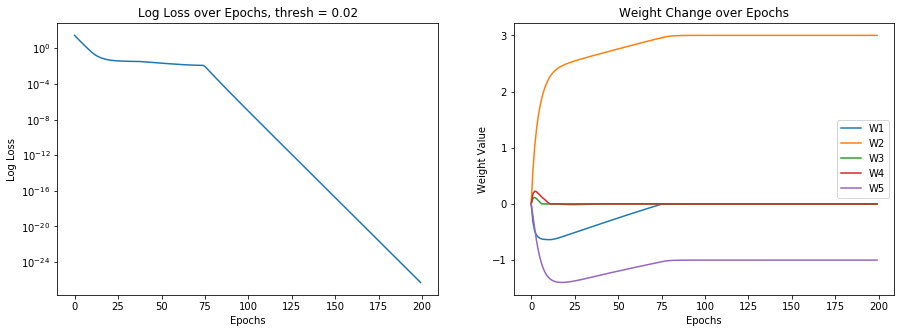

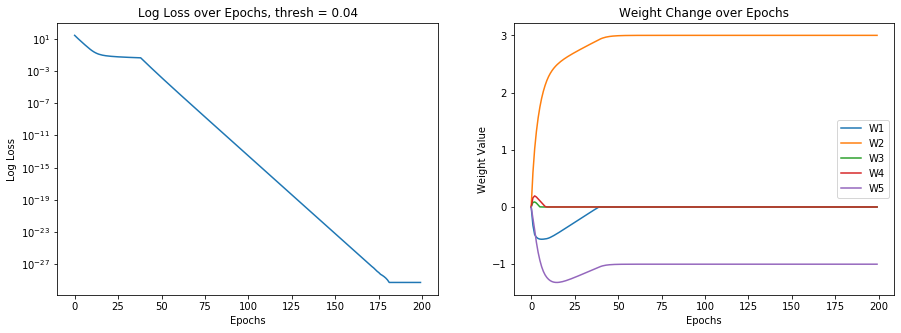

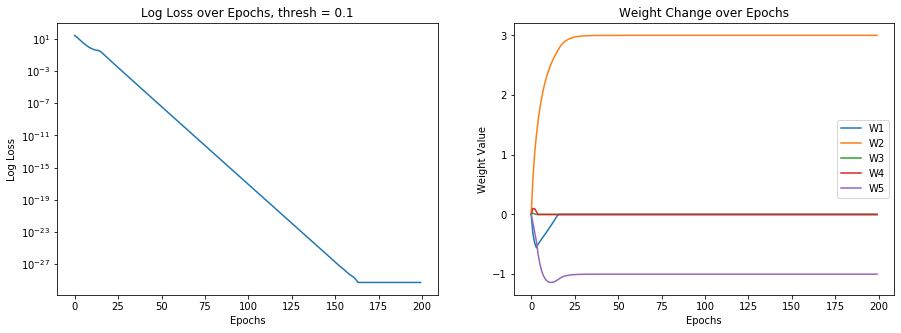

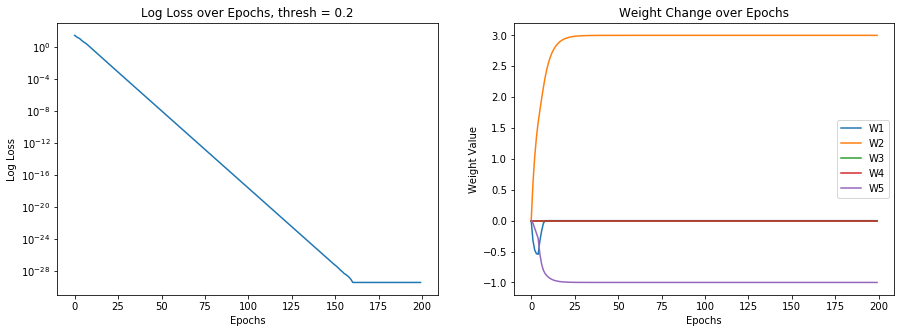

In [336]:
label_list = ['W1','W2','W3','W4','W5']
for i in range(0,4):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.yscale('log')
    plt.title(f'Log Loss over Epochs, thresh = {thresh[i]}')

    plt.plot(np.array(loss_list[i]))

    for j in range(0,5):
        plt.subplot(1,2,2)
        plt.plot(np.array(w_list[i][:,j]), label = label_list[j])
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Weight Value')
    plt.title('Weight Change over Epochs')
    plt.show()

**(g)** (Bonus 10 pts) Redo Problem (c) - (f), this time with 2 data points (X1,y1) and (X2,y2) only. For each method you may only try one λ or threshold that you think works the best. How is the convergence performance different from using 3 data points?

> **(c)** When using 2 data points instead of 3, for iterative pruning, I notcied that convergence took longer. It took longer for one of the weights to be pruned and thus longer for total convergence time. The optimal loss value appears to be the same but took longer to reach using only two data points. 


> **(d)** For l1 regularization with a lambda of 1, when using only two data points, I noted that took around 75 epochs compared to using 3 data points which took around 50 epochs. The optimal solution for the weights also appeared to oscillate more when using two data points. The optimal loss value appears to be the same but took longer to reach using only two data points. 

> **(e)** For the proximal gradient update, using only 2 data points too almost 150 epochs to reach convergence. With 3 data points, for the same threshold value, convergence was reached around 80 epochs. There was also less sparsity in the weights when only using 2 data points.


> **(f)** Once again I noticed that using 2 data points led to slower convergence and that it took more epochs to reach the optimal loss. 

> Overall it appears that using less data points means that convergence takes longer. This makes sense since were doing batch gradient descent. Since the weights are updated at the end, if we have three data points, the gradient accumulation will be larger and thus the update to the weights will be larger. 

(c)


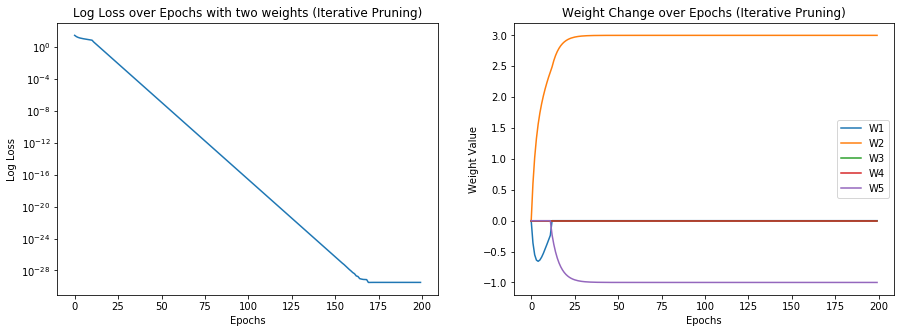

In [337]:
import numpy as np

u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200

x1, x2 = np.array([1, -2, -1, -1, 1]), np.array([2, -1, 2, 0, -2])
y1, y2 = -7, -1

# Load as one sample since were doing batch descent 
X = np.vstack((x1, x2))
y = np.vstack((y1, y2))

u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200

for i in range(epochs):
    num_prune = 3 # number of elements pruned to zero
    w_array[i] = w.flatten() # Store weights in pre-allocated array
    w = w - 2 * u * (X.T @ (X@w - y)) # Update weights
    w[np.argpartition(np.abs(w.flatten()), 3)[:3]] = 0
    losses.append(np.sum(((X @ w) - y)**2)) # Store loss
print('(c)')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.title('Log Loss over Epochs with two weights (Iterative Pruning)')
plt.plot(losses)


plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(w_array[:,i], label = f'W{i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Change over Epochs (Iterative Pruning)')
plt.show()

(d)


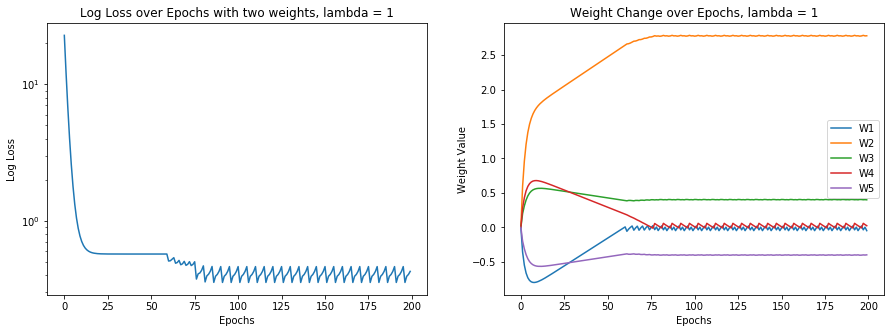

In [338]:
lamb = 1
loss_list = []
w_list = []


u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200

for i in range(epochs):
    w_array[i] = w.flatten() # Store weights in pre-allocated array
    w = w - 2 * u *((X.T @ (X@w - y)) + lamb*np.sign(w)) # Update weights (this time with l1 too)

    losses.append(np.sum(((X @ w) - y)**2)) #+ lamb * np.linalg.norm(w, ord=1)) # Store loss (this time with l1 too)
loss_list.append(losses)
w_list.append(w_array)

import warnings
warnings.filterwarnings('ignore')

label_list = ['W1','W2','W3','W4','W5']

print('(d)')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.title('Log Loss over Epochs with two weights, lambda = 1')
plt.plot(losses)


plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(w_array[:,i], label = f'W{i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Change over Epochs, lambda = 1')
plt.show()

(e)


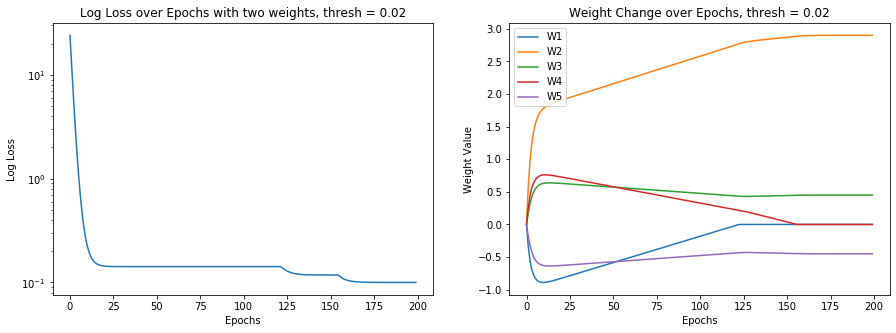

In [339]:
thresh = 0.02
w_list = []
loss_list =[]


u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200

for i in range(epochs):
    w_array[i] = w.flatten() # Store weights in pre-allocated array
    w = w - 2 * u *(X.T @ (X@w - y)) # Update weights 

    # Proximal
    greater = w > thresh
    zero = np.abs(w) <= thresh
    less = w < -thresh

    w[greater] -= thresh
    w[zero] = 0
    w[less] += thresh

    losses.append(np.sum(((X @ w) - y)**2)) # Store loss 
loss_list.append(losses)
w_list.append(w_array)

print('(e)')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.title('Log Loss over Epochs with two weights, thresh = 0.02')
plt.plot(losses)


plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(w_array[:,i], label = f'W{i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Change over Epochs, thresh = 0.02')
plt.show()

(f)


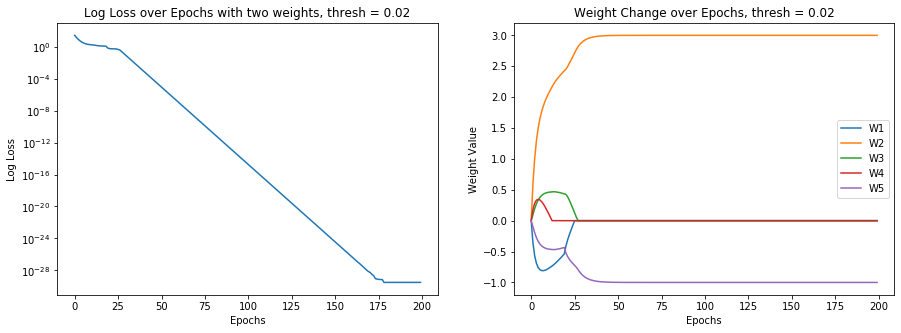

In [340]:
thresh = 0.1

w_list = []
loss_list =[]

u = 0.02
losses = []
w_array = np.zeros((200,5))
w = np.array([0,0,0,0,0]).reshape(5,1)
epochs = 200

for i in range(epochs):
    w_array[i] = w.flatten() # Store weights in pre-allocated array
    w = w - 2 * u *(X.T @ (X@w - y)) # Update weights 

    # Soft Threshold 3 lowest weights
    z = np.argsort(np.abs(w.flatten()))[:3]

    for i in z:
        if w[i] > thresh:
            w[i] -=thresh

        elif np.abs(w[i]) <= thresh:
            w[i] = 0

        elif w[i] < -thresh:
            w[i] += thresh

    losses.append(np.sum(((X @ w) - y)**2)) # Store loss 
loss_list.append(losses)
w_list.append(w_array)
    
print('(f)')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.title('Log Loss over Epochs with two weights, thresh = 0.02')
plt.plot(losses)


plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(w_array[:,i], label = f'W{i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Change over Epochs, thresh = 0.02')
plt.show()

# 3  Lab 2: Fixed-point quantization and finetuning (40 pts)

Besides pruning, fixed-point quantization is another important technique applied for deep neural network compression. In this Lab, you will convert the ResNet-20 model we used in previous lab into a quantized model, evaluate is performance and apply finetuning on the model. Everything you need for this lab can be found in HW4.zip.
The coding of this lab is fairly simple, so except for the part where you are asked to include a screenshot in the report, no code file needs to be submitted for this lab question. Please include all your results and observation into your PDF report.

**(a)** (10 pts) As is mentioned in lecture 14, to train a quantized model we need to use floating- point weight as trainable variable while use a straight-through estimator (STE) in forward and backward pass to convert the weight into quantized value. Intuitively, the forward pass of STE converts a float weight into fixed-point, while the backward pass passes the gradient straightly through the quantizer to the float weight.

To start with, implement the STE forward function in FP_layers.py, so that it serves as a linear quantizer with dynamic scaling, as introduced on page 9 of lecture 14. Please follow the comments in the code to figure out the expected functionality of each line. Take a screen shot of the finished STE class and paste it into the report.

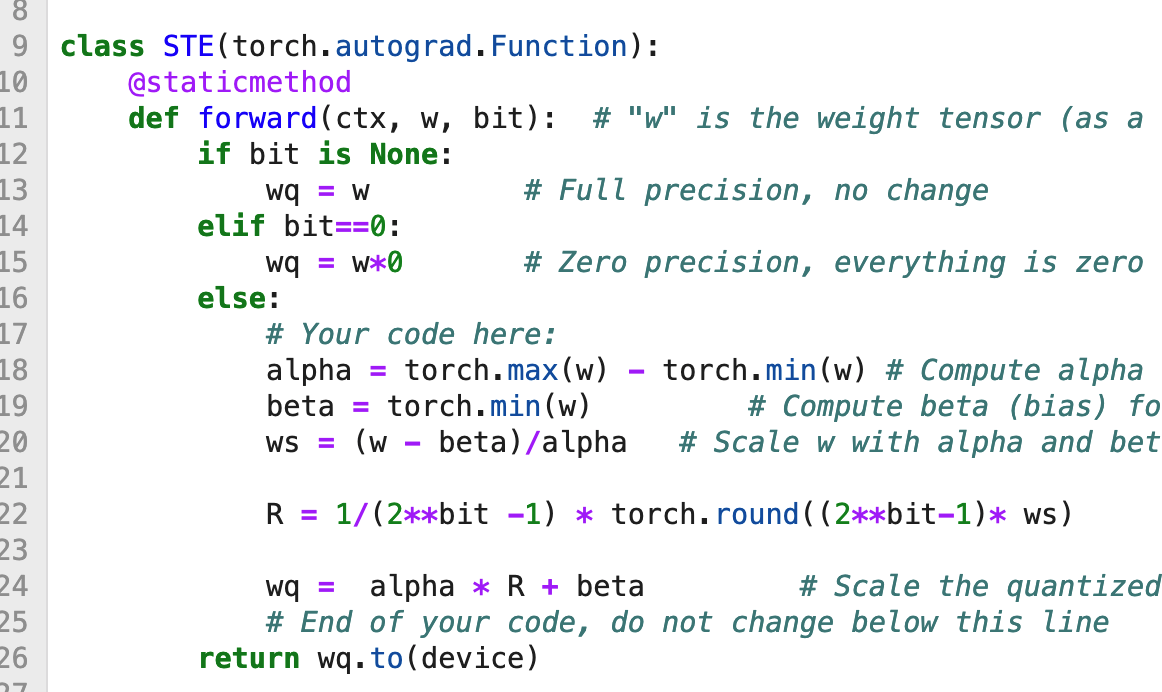

**(b)** (4 pts) In hw4.ipynb, run through the first three code block, report the accuracy of the floating-point pretrained model. Then set Nbits in the first line of block 4 to 6, 5, 4, 3, and 2 respectively, run it and report the test accuracy you got. (Hint: In this block the line defining the ResNet model (second line) will set the residual blocks in all three stages to Nbits fixed-point, while keeping the first conv and final FC layer still as floating point.)

|         Precision        | Test Accuracy |
|:------------------------:|:-------------:
| 32 bits (floating point) | 0.9151        |
| 2 bits                   | 0.0899        |
| 3 bits                   | 0.7662        |
| 4 bits                   | 0.8972        |
| 5 bits                   | 0.9112        |
| 6 bits                   | 0.9145        |

**(c)** (6 pts) With Nbits set to 4, 3, and 2 respectively, run code block 4 and 5 to finetune the quan- tized model. Please run 10 epochs of finetuning for 4-bit and 3-bit model, and run 20 epochs for the 2-bit model. You do not need to change other parameter in the finetune function except the number epochs. For each precision, report the highest testing accuracy you get during finetuning. Comment on the relationship between precision and accuracy, and on the effectiveness of finetuning.

|         Precision        | Test Accuracy before finetuning | Test Accuracy after finetuning|
|:------------------------:|:-------------:|:------------:|
| 2 bits                   | 0.0899       |0.8654       |
| 3 bits                   | 0.7662       |0.9064       |
| 4 bits                   | 0.8972       |0.9127       |

>Clearly higher precision leads to higher accuracy but the difference between 2 and 3 bits is much larger than the difference from 3 to 4 bits. From question (b), we can see that the accuracy barely dropped when using more bits as well, suggesting that if we retrained with 5 bits, the increase in accuracy from 4 to 5 bits would be less than the increase in accuracy from 3 to 4 bits. This suggests that more and more precision is not always useful and that models can be compressed by using less bits while maintaining near floating-point accuracy. The key is just to find what number of bits leads to minimal loss of performance. Finetuning appears to be very effective in restoring performance to the quantized model as shown in the Test Accuracy after retraining above. Even the 2-bit quantized model was able to be retrained in only 20 epochs. The 2-bit quantization did require more epochs but was able to return to an accuracy above 86%.   

**(d)** (6 pts) Now we move on to code block 6 and 7, where we explore the effectiveness of mixed- precision quantization. Here we use Nbits1, Nbits2 and Nbits3 to control the precision of the three stages in the ResNet-20 models respectively. You may take a look at resnet20.py if you are not sure what these three stages correspond to.
In Code block 6, set {4,4,2}, {4,2,4} and {2,4,4} precision to the three stages respective. In each case, run through block 6 and 7 and report the testing accuracy before and after finetuning. All the finetuning should be performed for 10 epochs.

|         Bits in each Stage        | Test Accuracy before finetuning | Test Accuracy after finetuning|
|:------------------------:|:-------------:|:------------:|
| {4,4,2}                  | 0.4727       |0.8919       |
| {4,2,4}               | 0.4157       |0.8863       |
| {2,4,4}                  |0.1041        |0.9042       |

**(e)** (9 pts) For each mixed-precision quantization scheme in (d), compute the average precision of all the weight elements in the model (consider float weight in first conv and final FC as 32-bit, do not count BN layers and bias). Please show how you compute this precision in detail in the report. (Hint: for average precision computation, recall what you did for the Huffman coding length computation in HW3. You can do this either by code or by hand.)

|         Bits in each Stage        | Average Precision|
|:------------------------:|:-------------:|
| {4,4,2}                  | 2.5988       |
| {4,2,4}               | 3.7328       |
| {2,4,4}                  |4.0087        |

> I computed the average percision by grabbing the number of non-zero weights from each FP_Linear and FP_Conv layer in the model. From the ResNet code, I was able to see that each block was made up of 6 layers. The first and the last layers were known to be 32 bits so I added them together and multiplied that value by 32. I took the sum of the non-zero weights from the next 6 layers and multiplied that by the value for NBits1. I took the sum of the count of non-zero parameters from layers 7-13 and multiplied this by Nbits2 and took the sum of the count of non-zero weights from lyaers 14-20 and multiplied this by Nbits3. Now that the number of bits for the three blocks and the first and last layers was calculated, I was able to divide the summation of these by the total number of non-zero weights in the model to get the average precision. The code is shown below. 

In [ ]:
from FP_layers import *

Nbits1, Nbits2, Nbits3 = 2,4,4

# Define quantized model and load weight
net = ResNetCIFAR(num_layers=20, Nbits1=Nbits1, Nbits2=Nbits2, Nbits3=Nbits3)  #Change the value of Nbits1, Nbits2, Nbits3 to finish (d) and (e)

net = net.to(device)
net.load_state_dict(torch.load("net_after_finetune.pt"))
#test(net)

num_nz = []

# Get weights from modules
for n, m in net.named_modules():
        if isinstance(m, FP_Linear):
            weight = m.linear.weight.data.cpu().numpy()
            weight = weight.flatten()
            num_parameters = weight.shape[0]
            num_nonzero_parameters = (weight != 0).sum()
            num_nz.append(num_nonzero_parameters)
        elif isinstance(m, FP_Conv):
            weight = m.conv.weight.data.cpu().numpy()
            weight = weight.flatten()
            num_parameters = weight.shape[0]
            num_nonzero_parameters = (weight != 0).sum()
            num_nz.append(num_nonzero_parameters)

# Calculate average bits
first_and_last = (num_nz[0] + num_nz[21])*32

# 6 in each block
first_block = np.array(num_nz[1:7]).sum() * Nbits1
second_block = np.array(num_nz[7:14]).sum() * Nbits2
third_block = np.array(num_nz[14:21]).sum() * Nbits3
# Total 
total = np.array(num_nz).sum()

average_bits = (first_and_last + first_block + second_block + third_block)/total
average_bits

**(f)** (5 pts) Combine the results in (d) and (e), which scheme do you think leads to the best accuracy- average precision tradeoff? Based on this observation, infer which of the three stages in the ResNet is the least important for reaching high accuracy?

> Combining the results in (d) and (e) I believe that {4,4,2} precision for the three stages was the best. It had an average precision of 2.6 which is the lowest out of the three tested bit-stage combinations and has an accuracy of 0.8919 which was the second highest out of the three tested bit-stage combinations. It was a little bit mroe than 1% lower than the top accuracy which was achieved with {2,4,4} bits. Based on this observation, I would infer that the final stage of ResNet is the least important for reaching a high accuracy as the accuracy did not drop by a large amount when we set stage 3 to 2 bits. 